# NN with backpropagation exercise

In [1]:
import numpy as np
from matplotlib import pyplot as plt

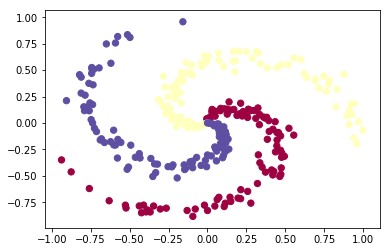

In [2]:
# Generate a spiral dataset
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8')  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# initialize parameters randomly
# hidden layer parameters
h = 100 # size of hidden layer (amount of neurons)
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
# ouput layer parameters
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [4]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation f(input) = max(0,input)
scores = np.dot(hidden_layer, W2) + b2

In [6]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

num_examples = X.shape[0]
# main loop
for i in range(10000):
    # forward pass
    # input -> hidden layer
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    # hidden layer -> output layer
    scores = np.dot(hidden_layer, W2) + b2

    # calculate props (de-logarithm + normalization)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # calculate loss L1: -log(e^f_k/sum(e^f_j))
    corect_logprobs = -np.log(probs[range(num_examples), y])

    # calculate complete loss: L = 1/n * L1 + regularization
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
    
    # calculate gradient: dL_i/d_f_k = p-1; calculate dscores, the gradient for scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
    
    # backpropagate
    # derive dW, db, dW2, db2
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098485
iteration 1000: loss 0.306328
iteration 2000: loss 0.285431
iteration 3000: loss 0.267287
iteration 4000: loss 0.265496
iteration 5000: loss 0.256826
iteration 6000: loss 0.254878
iteration 7000: loss 0.253911
iteration 8000: loss 0.253102
iteration 9000: loss 0.251898


In [7]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99
